<a href="https://colab.research.google.com/github/martinparlanti/Portfolios/blob/main/Monte_Carlo_Simulation_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns



Function to download historical data




In [60]:
def get_stock_data(ticker, start_date, end_date):
 data = pd.DataFrame()
 for ticker in stocks:
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
  data[ticker] = stock_data
 return data


Initial configuration

In [61]:
stocks = ['AAPL','MSFT','SPY','WM','JNJ','NVDA','TSLA','GLD','TLT','XLE','PG','BAC','JPM']
start_date = '2019-01-01'
end_date = '2026-01-01'

Obtaining data

In [62]:
stock_data = get_stock_data(stocks, start_date, end_date)
stock_data.head()

/tmp/ipython-input-1132997411.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1132997411.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1132997411.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1132997411.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start= start_date, end = end_date)['Close']
[********************

,AAPL,MSFT,SPY,WM,JNJ,NVDA,TSLA,GLD,TLT,XLE,PG,BAC,JPM
Date,,,,,,,,,,,,,
2019-01-02,37.503735,94.612617,224.995346,78.991150,104.942833,3.377166,20.674667,121.330002,100.175354,21.261770,75.915619,21.063482,81.250214
2019-01-03,33.768074,91.131981,219.626312,78.777481,103.275246,3.173129,20.024000,122.430000,101.315292,21.050898,75.383369,20.725931,80.095497
2019-01-04,35.209621,95.370483,226.982895,80.869797,105.008545,3.376424,21.179333,121.440002,100.142555,21.767128,76.921951,21.586699,83.048256
2019-01-07,35.131252,95.492104,228.772568,81.065636,104.334930,3.555172,22.330667,121.860001,99.847313,22.090714,76.614250,21.569826,83.105980
2019-01-08,35.800953,96.184509,230.921936,82.214195,106.758286,3.466665,22.356667,121.529999,99.584885,22.261591,76.897003,21.527622,82.949280


Daily returns

In [63]:
returns = stock_data.pct_change()
returns.head()

,AAPL,MSFT,SPY,WM,JNJ,NVDA,TSLA,GLD,TLT,XLE,PG,BAC,JPM
Date,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099608,-0.036788,-0.023863,-0.002705,-0.015890,-0.060417,-0.031472,0.009066,0.011379,-0.009918,-0.007011,-0.016025,-0.014212
2019-01-04,0.042690,0.046509,0.033496,0.026560,0.016783,0.064068,0.057697,-0.008086,-0.011575,0.034024,0.020410,0.041531,0.036865
2019-01-07,-0.002226,0.001275,0.007885,0.002422,-0.006415,0.052940,0.054361,0.003458,-0.002948,0.014866,-0.004000,-0.000782,0.000695
2019-01-08,0.019063,0.007251,0.009395,0.014168,0.023227,-0.024895,0.001164,-0.002708,-0.002628,0.007735,0.003691,-0.001957,-0.001886


Parameters for Monte Carlo simulation

In [64]:
num_portfolios = 1000
rf_rate = 0.04

Arrays to save the results

In [65]:
all_weights = np.zeros((num_portfolios,len(stocks)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)


In [66]:
for port in range(num_portfolios):
  weights = np.random.random(len(stocks))
  weights = weights/np.sum(weights)  #Normalizacion de pesos
  all_weights[port,:] = weights

  port_ret = np.sum(returns.mean()*weights)*252
  ret_arr[port] = port_ret

  port_vol = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
  vol_arr[port] = port_vol

  sharpe_port = (port_ret-rf_rate)/port_vol
  sharpe_arr[port] = sharpe_port


In [67]:
optimal_idx = sharpe_arr.argmax()
optimal_weights = all_weights[optimal_idx,:]
optimal_ret = ret_arr[optimal_idx]
optimal_vol = vol_arr[optimal_idx]
optimal_sharpe = sharpe_arr[optimal_idx]

results = pd.DataFrame({'Return':ret_arr,'Volatility':vol_arr,'Sharpe Ratio':sharpe_arr})

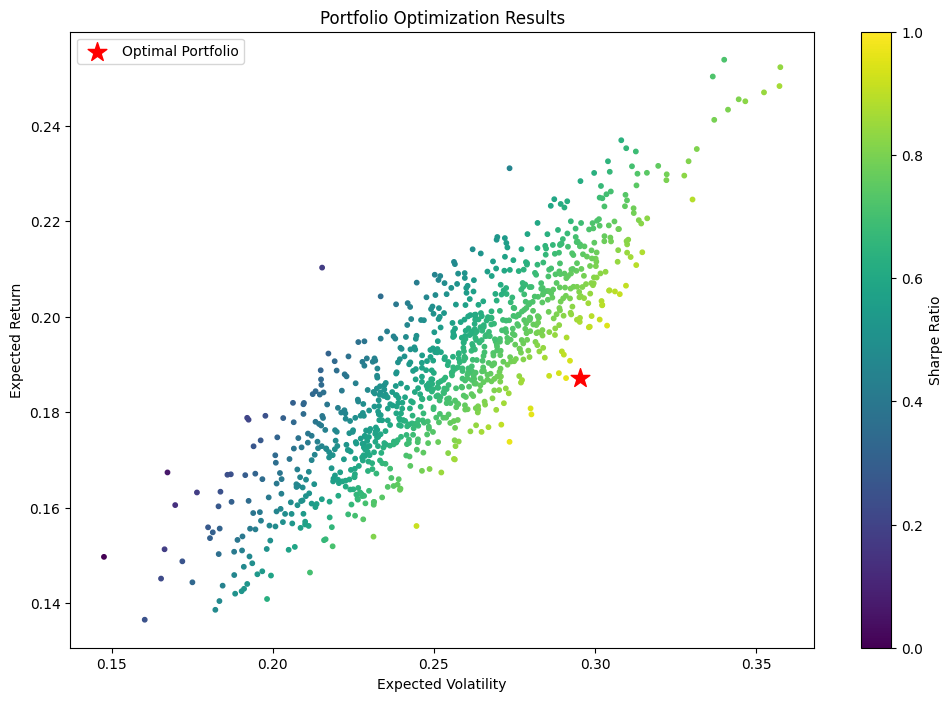

The optimal portfolio:
Return: 29.54%
Volatility: 18.72%
Sharpe Ratio: 136.43%
AAPL: 8.94%
MSFT: 3.89%
SPY: 1.35%
WM: 10.52%
JNJ: 15.26%
NVDA: 13.37%
TSLA: 10.81%
GLD: 14.84%
TLT: 4.55%
XLE: 3.00%
PG: 8.18%
BAC: 1.29%
JPM: 4.01%


In [68]:
plt.figure(figsize=(12,8))
plt.scatter(ret_arr,vol_arr,c=sharpe_arr,cmap='viridis', marker='o',s=10)
plt.scatter(optimal_ret, optimal_vol,c='red',marker='*',s=200, label="Optimal Portfolio")
plt.ylabel('Expected Return')
plt.xlabel('Expected Volatility')
plt.colorbar(label='Sharpe Ratio')
plt.title("Portfolio Optimization Results")
plt.legend()
plt.show()

print("The optimal portfolio:")
print(f"Return: {optimal_ret*100:.2f}%")
print(f"Volatility: {optimal_vol*100:.2f}%")
print(f"Sharpe Ratio: {optimal_sharpe*100:.2f}%")
for stock,weight in zip(stocks,optimal_weights):
  print(f"{stock}: {weight*100:.2f}%")